In [64]:
import sys
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

sys.path.append(os.path.abspath(os.path.join("..", "src")))

df = pd.read_csv('../Data/Processed/hotel_clean4.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [59]:
meal_cols = [
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 2',
    'type_of_meal_plan_Meal Plan 3'
]

# Somme sur les colonnes de formules repas
df['meal_plan_selected'] = df[meal_cols].sum(axis=1)

# Convertir en 0/1 (1 si au moins une formule choisie, 0 sinon)
df['meal_plan_selected'] = df['meal_plan_selected'].apply(lambda x: 1 if x > 0 else 0)

In [34]:


# Supposons que df soit ton DataFrame
room_type_cols = [
    'room_type_reserved_Room_Type 1',
    'room_type_reserved_Room_Type 2',
    'room_type_reserved_Room_Type 3',
    'room_type_reserved_Room_Type 4',
    'room_type_reserved_Room_Type 5',
    'room_type_reserved_Room_Type 6',
    'room_type_reserved_Room_Type 7'
]

# Crée une seule colonne avec la valeur correspondant au numéro de type
df['room_type_reserved'] = df[room_type_cols].idxmax(axis=1).str.extract(r'Room_Type (\d)').astype(int)

# Supprime les colonnes one-hot originales
df.drop(columns=room_type_cols, inplace=True)



In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [56]:
# 1. total_nights
df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

# 2. total_people
df['total_people'] = df['no_of_adults'] + df['no_of_children']

# 3. price_per_person avec réaffectation directe
df['price_per_person'] = df['avg_price_per_room'] / df['total_people']
df['price_per_person'] = df['price_per_person'].replace([np.inf, -np.inf], np.nan)
df['price_per_person'] = df['price_per_person'].fillna(df['avg_price_per_room'])

# 4. is_family
df['is_family'] = (df['no_of_children'] > 0).astype(int)

# 5. stay_duration_flag
df['stay_duration_flag'] = (df['total_nights'] > 7).astype(int)



In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [38]:
df['lead_time_category'] = pd.cut(
    df['lead_time'],
    bins=[-1, 7, 30, 90, 180, 443],
    labels=['0-7j', '8-30j', '31-90j', '91-180j', '181j+']
)

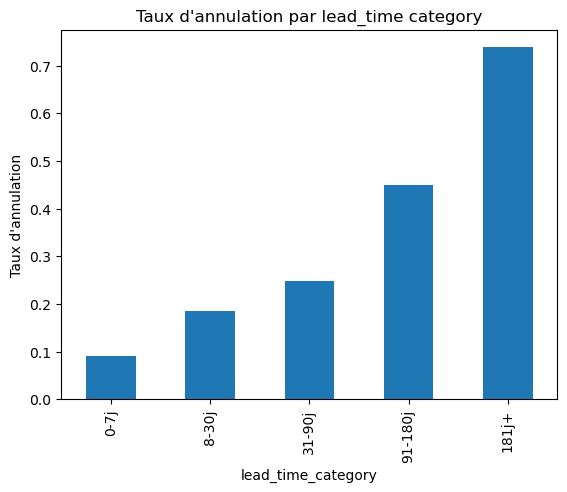

In [39]:
import matplotlib.pyplot as plt
# On suppose que 'booking_status_Not_Canceled' = 1 si non annulé, donc on inverse
df['booking_canceled'] = 1 - df['booking_status_Not_Canceled']

# Taux d'annulation par catégorie
cancel_rate = df.groupby('lead_time_category', observed=True)['booking_canceled'].mean()
cancel_rate.plot(kind='bar', title="Taux d'annulation par lead_time category")
plt.ylabel("Taux d'annulation")
plt.show()

In [40]:
df = pd.get_dummies(df, columns=['lead_time_category'], drop_first=True)


In [66]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [65]:
cols_to_drop = [
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 2',
    'type_of_meal_plan_Meal Plan 3',
    'type_of_meal_plan_Not Selected'
]

df = df.drop(columns=cols_to_drop)

In [67]:
df.to_csv("../Data/Processed/hotel_clean4.csv", index=False)

In [52]:
# Liste des colonnes lead_time_category booléennes
lead_time_cols = [
    'lead_time_category_8-30j',
    'lead_time_category_31-90j',
    'lead_time_category_91-180j',
    'lead_time_category_181j+'
]

# Conversion de toutes ces colonnes en int (True -> 1, False -> 0)
df[lead_time_cols] = df[lead_time_cols].astype(int)

# Maintenant, tu peux faire la description sur toutes à la fois
print(df[lead_time_cols].describe())




       lead_time_category_8-30j  lead_time_category_31-90j  \
count              29999.000000               29999.000000   
mean                   0.182006                   0.298510   
std                    0.385856                   0.457612   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    0.000000                   1.000000   
max                    1.000000                   1.000000   

       lead_time_category_91-180j  lead_time_category_181j+  
count                29999.000000              29999.000000  
mean                     0.214607                  0.146538  
std                      0.410556                  0.353651  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%    

In [45]:
# Pourcentage de valeurs manquantes par colonne
df.isnull().mean() * 100

no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
required_car_parking_space              0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
type_of_meal_plan_Meal Plan 1           0.0
type_of_meal_plan_Meal Plan 2           0.0
type_of_meal_plan_Meal Plan 3           0.0
type_of_meal_plan_Not Selected          0.0
market_segment_type_Aviation            0.0
market_segment_type_Complementary       0.0
market_segment_type_Corporate           0.0
market_segment_type_Offline             0.0
market_segment_type_Online      

In [46]:
# Nombre de doublons sur toutes les colonnes
df.duplicated().sum()

# Voir les doublons eux-mêmes
df[df.duplicated()]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved,total_nights,total_people,price_per_person,is_family,stay_duration_flag,lead_time_category_8-30j,lead_time_category_31-90j,lead_time_category_91-180j,lead_time_category_181j+
20,2,0,2,2,0,99,2017,10,30,0,...,1,4,2,32.50,0,0,False,False,True,False
154,2,0,0,1,0,55,2018,4,6,0,...,1,1,2,52.00,0,0,False,True,False,False
272,2,0,1,2,0,161,2018,3,25,0,...,1,3,2,65.00,0,0,False,False,True,False
301,1,0,0,2,0,188,2018,6,15,0,...,1,2,1,130.00,0,0,False,False,False,True
319,2,0,0,2,0,320,2018,8,18,0,...,1,2,2,57.50,0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29989,2,0,1,2,0,56,2018,11,14,0,...,1,3,2,37.50,0,0,False,True,False,False
29991,2,0,0,2,0,86,2017,9,24,0,...,1,2,2,52.50,0,0,False,True,False,False
29992,2,0,0,2,0,6,2018,1,12,0,...,1,2,2,34.75,0,0,False,False,False,False
29994,2,0,0,2,0,322,2018,12,9,0,...,1,2,2,26.00,0,0,False,False,False,True


In [51]:
print(df.describe(include='all'))

        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   29999.000000    29999.000000          29999.000000       29999.000000   
unique           NaN             NaN                   NaN                NaN   
top              NaN             NaN                   NaN                NaN   
freq             NaN             NaN                   NaN                NaN   
mean        1.845862        0.105037              0.806127           2.202140   
std         0.518453        0.403747              0.868561           1.402214   
min         0.000000        0.000000              0.000000           0.000000   
25%         2.000000        0.000000              0.000000           1.000000   
50%         2.000000        0.000000              1.000000           2.000000   
75%         2.000000        0.000000              2.000000           3.000000   
max         4.000000       10.000000              7.000000          17.000000   

        required_car_parkin